In [15]:

# 1. Packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import choice

In [16]:
# 2. Functions
# Function to calculate expected value
expected_value = lambda values: sum(values) / len(values)

# Function to calculate standard deviation
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values]) / len(values))



In [17]:
# 3. Data

# Generate a population with a normal distribution
mu, sigma = 40, 1  # mean and standard deviation
population = np.random.normal(mu, sigma, 100000)


In [18]:
# 4. Methods of Moments


# Calculate the expected value and standard deviation of the population
mean = expected_value(population)
s_d = standard_deviation(population, mean)

print(f'Overall population: expected value: {mean}, standard deviation: {s_d}')

Overall population: expected value: 40.0060858832612, standard deviation: 0.9982296799042797


In [19]:
# 5. Samples
# Select a random sample from the population
randomly_selected_items = [choice(population) for _ in range(500)]

# Calculate the expected value and standard deviation of the sample
mean = expected_value(randomly_selected_items)
s_d = standard_deviation(randomly_selected_items, mean)

print(f'Randomly selected items: expected value: {mean}, standard deviation: {s_d}')

Randomly selected items: expected value: 40.0155791910445, standard deviation: 1.0251945101779616


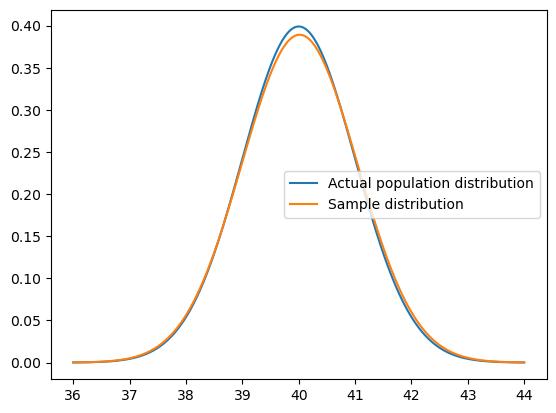

In [20]:
# 6 Comparison
# Plot the actual population distribution and the sample distribution
xs = np.arange(36, 44, 0.001)
actual_ys = norm.pdf(xs, mu, sigma)
ys = norm.pdf(xs, mean, s_d)

plt.plot(xs, actual_ys, label='Actual population distribution')
plt.plot(xs, ys, label='Sample distribution')
plt.legend(loc="best")
plt.show()

In [21]:
# https://math.stackexchange.com/questions/4355290/method-of-moments-estimator-for-lognormal-distribution
# https://brilliant.org/wiki/log-normal-distribution/

# Generate a log-normal distribution
mu, sigma = 3.0, 1.0  # mean and standard deviation of the underlying normal distribution
s = np.random.lognormal(mu, sigma, 1000)

# Calculate the sample mean and variance
sample_mean = np.mean(s)
sample_var = np.var(s)

# Use the method of moments to estimate the parameters of the lognormal distribution
estimated_mu = np.log(sample_mean) - 0.5 * np.log(1 + (sample_var / (sample_mean ** 2)))
estimated_sigma = np.sqrt(np.log(1 + (sample_var / (sample_mean ** 2))))

print(f'Estimated mu: {estimated_mu}, Estimated sigma: {estimated_sigma}')

Estimated mu: 3.1167521818159805, Estimated sigma: 0.9246651433465958


C:\Users\lyu\AppData\Local\Temp\ipykernel_16388\106650878.py:7: RuntimeWarning: invalid value encountered in log
  pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))


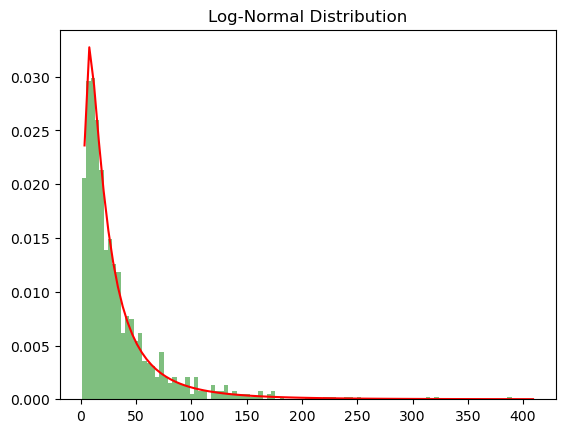

In [22]:
# Plot the histogram
count, bins, ignored = plt.hist(s, 100, density=True, alpha=.5, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, 'r') 

plt.title('Log-Normal Distribution')
plt.show()